In [1]:
import pandas as pd
reddit = pd.read_csv('coffee_comp.csv')
reddit.head()

,title,selftext,score,url,created_date,num_comments,author,post_id,comment_body,comment_author,comment_score,comment_created_date
0,James Hoffmann - I Tried Every New Starbucks O...,NaN,730.0,https://www.youtube.com/watch?v=XewgO7j6y-E,3/31/23 14:07,175.0,Miroresh,127mly3,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127mly3,Mod Note: This video has now gone private. We...,Anomander,1.0,4/5/23
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127mly3,‚Ä¶ the what,mrpopenfresh,118.0,3/31/23
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127mly3,‚ÄúBut then my brain adjusted to the nuts.‚Äù,theschlaepfer,340.0,3/31/23
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127mly3,"The deconstructed one... Holy shit, that's a l...",TotalStatisticNoob,106.0,3/31/23


In [2]:
reddit['created_date'] = pd.to_datetime(reddit['created_date'], errors='coerce')
reddit['comment_created_date'] = pd.to_datetime(reddit['comment_created_date'], errors='coerce')

# Fill missing text fields with empty strings to prevent issues during text processing
reddit['title'].fillna('', inplace=True)
reddit['comment_body'].fillna('', inplace=True)

# Stack the post and comment text into a single 'combined_text' column
reddit['combined_text'] = reddit['title'] + " " + reddit['comment_body']
reddit['year'] = reddit['created_date'].dt.year.fillna(reddit['comment_created_date'].dt.year)

In [5]:
reddit_2 = reddit[['year','combined_text']]

In [7]:
quora_df = pd.read_csv('quora_dataset.csv')
quora_df['year'] = pd.to_datetime(quora_df['Date']).dt.year

In [9]:
quora_df[['year','Comment','Question']].head()

,year,Comment,Question
0,2021,Overpriced? Yes.\n\nBut the good news for me i...,What-is-your-opinion-of-Starbucks
1,2021,I have a very unpopular opinion about Starbuck...,What-is-your-opinion-of-Starbucks
2,2021,"I think Starbucks managed to ruin coffee, turn...",What-is-your-opinion-of-Starbucks
3,2021,"While Starbucks hot chocolate is tastey, it do...",What-is-your-opinion-of-Starbucks
4,2021,An opinion from Russia.\n \n I am actually pre...,What-is-your-opinion-of-Starbucks


In [11]:
df = pd.concat([reddit.rename(columns = {'combined_text':'Comment'})[['Comment','year']] , quora_df[['Comment','year']]], axis=0)
df = df[df['year']>2019]

In [13]:
df.shape

(2962, 2)

### Analysis

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet data if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize the text
def lemmatize_text(text):
    words = nltk.word_tokenize(text)  # Tokenize the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Join the lemmatized words back into a string

# Define a text preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Lemmatize the text
    text = lemmatize_text(text)
    return text

# Apply preprocessing to the comments column
df['cleaned_comments'] = df['Comment'].apply(preprocess_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:

# Initialize stopwords and include any custom stopwords if necessary
stop_words = list(stopwords.words('english'))  # Convert set to list

# Create a CountVectorizer for unigrams (ngram_range=(1, 1))
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)
X_unigram = unigram_vectorizer.fit_transform(df['cleaned_comments'])
unigram_features = unigram_vectorizer.get_feature_names_out()
unigram_word_counts = X_unigram.toarray().sum(axis=0)

# Create a dataframe for unigrams
unigram_freq_df = pd.DataFrame({'unigram': unigram_features, 'frequency': unigram_word_counts})
unigram_freq_df = unigram_freq_df.sort_values(by='frequency', ascending=False)

# Create a CountVectorizer for bigrams (ngram_range=(2, 2))
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X_bigram = bigram_vectorizer.fit_transform(df['cleaned_comments'])
bigram_features = bigram_vectorizer.get_feature_names_out()
bigram_word_counts = X_bigram.toarray().sum(axis=0)

# Create a dataframe for bigrams
bigram_freq_df = pd.DataFrame({'bigram': bigram_features, 'frequency': bigram_word_counts})
bigram_freq_df = bigram_freq_df.sort_values(by='frequency', ascending=False)

# Export the dataframes to separate CSV files
unigram_freq_df.to_csv('combined_dataset/unigram_frequencies.csv', index=False)
bigram_freq_df.to_csv('combined_dataset/bigram_frequencies.csv', index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
import numpy as np
# Replace occurrences of specific words with 'local_coffee_shop'
def replace_with_local_shop(text):
    replacements = ['locally', 'localised', 'locallyowned', 'artisan', 'artisanal', 'small business']
    for word in replacements:
        text = text.replace(word, 'local_coffee_shop')
    return text

# Apply the replacement to the cleaned comments
df['cleaned_comments'] = df['cleaned_comments'].apply(replace_with_local_shop)

# Recalculate unigrams for updated comments
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned_comments'])
features = vectorizer.get_feature_names_out()

# Create a new dataframe for unigrams and frequencies
word_counts = X.toarray().sum(axis=0)
updated_unigram_freq_df = pd.DataFrame({'unigram': features, 'frequency': word_counts})

# List of brands to analyze (including 'local_coffee_shop')
brands = ['starbucks', 'dunkin', 'costa', 'mccafe', 'lavazza', 'peet', 'local_coffee_shop']

# Filter unigram dataframe for the selected brands
brand_frequencies = updated_unigram_freq_df[updated_unigram_freq_df['unigram'].isin(brands)]

# Create a brand cross-brand matrix (9x9) for lift calculation
lift_matrix = pd.DataFrame(index=brands, columns=brands, data=0)
lift_matrix

,starbucks,dunkin,costa,mccafe,lavazza,peet,local_coffee_shop
starbucks,0,0,0,0,0,0,0
dunkin,0,0,0,0,0,0,0
costa,0,0,0,0,0,0,0
mccafe,0,0,0,0,0,0,0
lavazza,0,0,0,0,0,0,0
peet,0,0,0,0,0,0,0
local_coffee_shop,0,0,0,0,0,0,0


In [21]:

# Calculate lift between each pair of brands
total_word_count = updated_unigram_freq_df['frequency'].sum()

import numpy as np

# Calculate lift between each pair of brands (same as before)
for brand1 in brands:
    freq1 = updated_unigram_freq_df[updated_unigram_freq_df['unigram'] == brand1]['frequency'].values[0]
    for brand2 in brands:
        freq2 = updated_unigram_freq_df[updated_unigram_freq_df['unigram'] == brand2]['frequency'].values[0]
        joint_freq = (df['cleaned_comments'].str.contains(brand1) & df['cleaned_comments'].str.contains(brand2)).sum()
        lift_matrix.loc[brand1, brand2] = (joint_freq * df.shape[0]) / (freq1 * freq2)
lift_matrix

,starbucks,dunkin,costa,mccafe,lavazza,peet,local_coffee_shop
starbucks,0.804258,1.145947,0.903209,0.935467,0.818534,32.741341,1.484274
dunkin,1.145947,27.768750,0.638362,5.289286,9.256250,222.150000,10.367000
costa,0.903209,0.638362,33.458977,7.295567,0.000000,0.000000,0.000000
mccafe,0.935467,5.289286,7.295567,226.683673,0.000000,0.000000,0.000000
lavazza,0.818534,9.256250,0.000000,0.000000,277.687500,1110.750000,29.620000
peet,32.741341,222.150000,0.000000,0.000000,1110.750000,56278.000000,473.920000
local_coffee_shop,1.484274,10.367000,0.000000,0.000000,29.620000,473.920000,146.915200


In [37]:

# Replace zero values with a reasonable small value (10th percentile of non-zero values)
# Filter out non-zero and non-NaN values from the lift matrix
non_zero_lift_values = lift_matrix[lift_matrix > 0].values  # Get all non-zero values
non_zero_lift_values = non_zero_lift_values[~np.isnan(non_zero_lift_values)]  # Remove any NaN values

# Check if there are valid non-zero values
if len(non_zero_lift_values) > 0:
    # Compute the 10th percentile of non-zero lift values
    tenth_percentile_value = np.percentile(non_zero_lift_values, 10)
else:
    raise ValueError("No valid non-zero values found in the lift matrix.")

# Replace zero values in the lift matrix with the 10th percentile value
lift_matrix.replace(0, tenth_percentile_value, inplace=True)

lift_matrix.round(3)

,starbucks,dunkin,costa,mccafe,lavazza,peet,local_coffee_shop
starbucks,0.804,1.146,0.903,0.935,0.819,32.741,1.484
dunkin,1.146,27.769,0.638,5.289,9.256,222.150,10.367
costa,0.903,0.638,33.459,7.296,0.819,0.819,0.819
mccafe,0.935,5.289,7.296,226.684,0.819,0.819,0.819
lavazza,0.819,9.256,0.819,0.819,277.688,1110.750,29.620
peet,32.741,222.150,0.819,0.819,1110.750,56278.000,473.920
local_coffee_shop,1.484,10.367,0.819,0.819,29.620,473.920,146.915


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


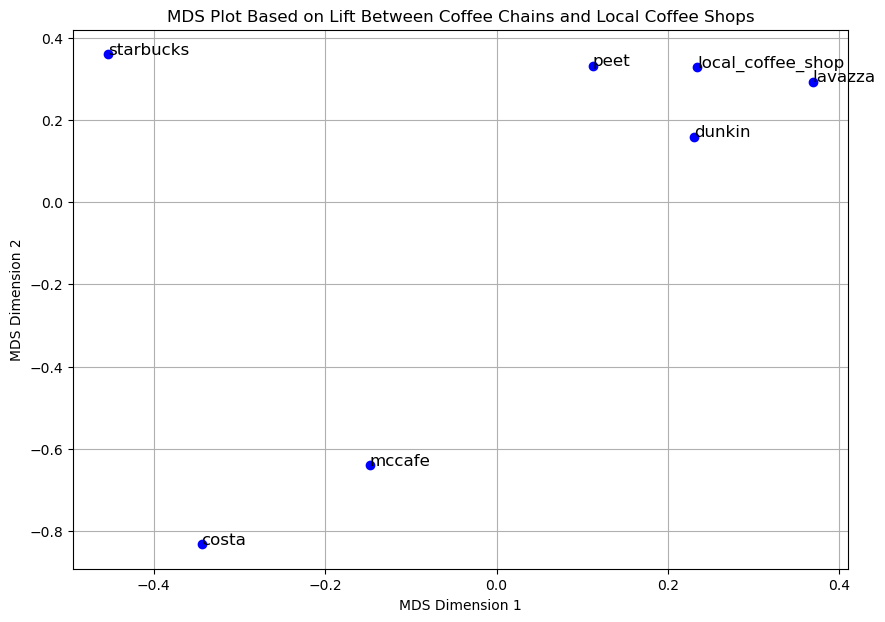

In [39]:
# Perform MDS on the inverse of the lift matrix
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Take the inverse of lift to compute distances for MDS
distances = 1 / lift_matrix.values

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(distances)

# Plot the MDS results
plt.figure(figsize=(10, 7))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], color='blue')

# Add labels for each brand
for i, brand in enumerate(brands):
    plt.text(mds_coords[i, 0], mds_coords[i, 1], brand, fontsize=12)

plt.title("MDS Plot Based on Lift Between Coffee Chains and Local Coffee Shops")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()

## Attribute Analysis

Vector for 'taste':
[-0.24656  0.2876   0.56388  0.12103 -0.54432  0.55347  0.49603 -0.23516
 -0.21113  0.27861]...
Vector for 'location':
[-0.15414 -0.44185  0.67888  0.64191 -0.11321 -0.48105 -0.15501  0.31201
  0.19953  0.34545]...
Vector for 'ambiance':
[-0.22804    0.072139   0.60297    0.075631  -0.11093    0.34946
 -0.010077   0.0011716  0.18379    0.56794  ]...
Vector for 'variety':
[-0.62101   0.57837  -0.55624   0.29583   0.55339  -0.038977 -0.019593
  0.024722 -0.46434   0.019804]...


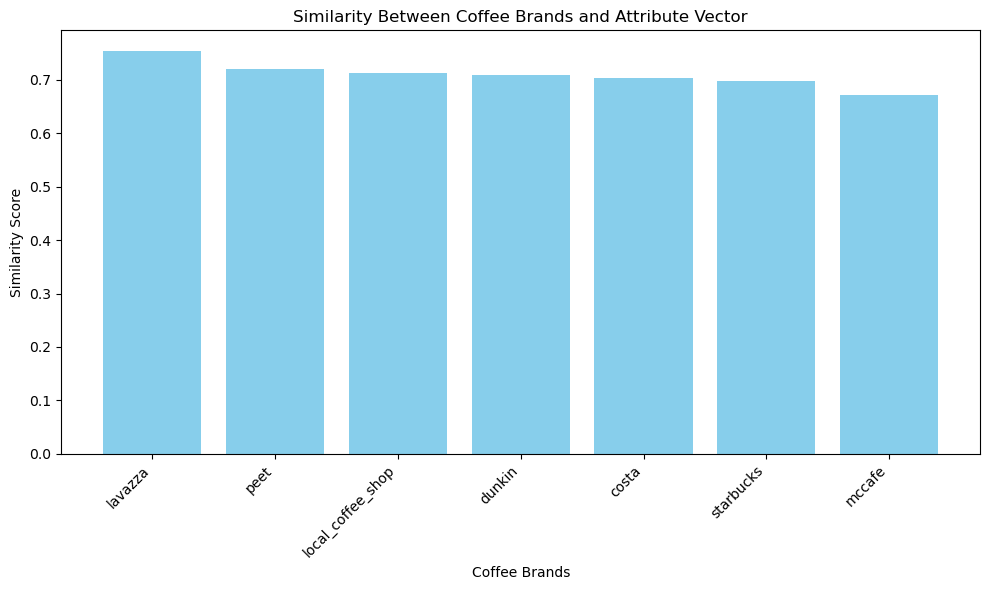

In [42]:
import numpy as np

# Load the GloVe embeddings (assuming 100D GloVe file is used)
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Define the attribute words
attributes = ['taste', 'location', 'ambiance', 'variety']
#attributes = ['price','expensive', 'cheap','overpriced']

# Load GloVe embeddings (assuming the file path is set to the location of the GloVe file)
glove_file_path = 'glove.6B/glove.6B.100d.txt'  # Update this with the actual path
glove_embeddings = load_glove_embeddings(glove_file_path)

# Extract vectors for the attributes from the GloVe embeddings
attribute_vectors = {}
for attribute in attributes:
    if attribute in glove_embeddings:
        attribute_vectors[attribute] = glove_embeddings[attribute]
    else:
        print(f"'{attribute}' not found in GloVe embeddings")

# Output the vectors for each attribute
for attribute, vector in attribute_vectors.items():
    print(f"Vector for '{attribute}':\n{vector[:10]}...")  # Displaying only the first 10 dimensions for brevity

from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity
def calculate_cosine_similarity(vector1, vector2):
    return cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1))[0][0]

# Step 1: Create the aggregate attribute vector by averaging
def create_aggregate_attribute_vector(attribute_vectors):
    attribute_matrix = np.array(list(attribute_vectors.values()))
    aggregate_vector = np.mean(attribute_matrix, axis=0)
    return aggregate_vector

# Step 2: Create a vector for each brand based on comments mentioning that brand
def create_brand_vector(brand, glove_embeddings, comments):
    brand_comments = comments[comments.str.contains(brand, case=False)]  # Filter comments mentioning the brand
    words = ' '.join(brand_comments).split()  # Tokenize all words in the comments
    vectors = [glove_embeddings[word] for word in words if word in glove_embeddings]  # Get GloVe vectors
    if len(vectors) > 0:
        brand_vector = np.mean(vectors, axis=0)  # Average the vectors
    else:
        brand_vector = np.zeros(100)  # Fallback to zero vector if no valid words found
    return brand_vector

# Step 3: Compare each brand vector with the aggregate attribute vector using cosine similarity
def compare_brands_with_attributes(brands, glove_embeddings, comments, attribute_vector):
    similarities = {}
    for brand in brands:
        brand_vector = create_brand_vector(brand, glove_embeddings, comments)
        similarity_score = calculate_cosine_similarity(attribute_vector, brand_vector)
        similarities[brand] = similarity_score
    return similarities

# Load the GloVe embeddings (assuming you've already loaded them as 'glove_embeddings')

# Create the aggregate attribute vector
attribute_vector = create_aggregate_attribute_vector(attribute_vectors)

# Define the list of brands
brands = ['starbucks', 'dunkin', 'costa', 'mccafe', 'lavazza', 'peet', 'local_coffee_shop']

# Assuming 'df' has a 'Comment' column with comments related to coffee
comments = df['cleaned_comments']  # Replace this with your actual comments dataframe/series

# Step 4: Calculate similarity for each brand
similarity_scores = compare_brands_with_attributes(brands, glove_embeddings, comments, attribute_vector)

# Sort similarity scores in descending order
sorted_similarities = dict(sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True))

# Plot a bar chart of the similarity scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sorted_similarities.keys(), sorted_similarities.values(), color='skyblue')
plt.title('Similarity Between Coffee Brands and Attribute Vector')
plt.xlabel('Coffee Brands')
plt.ylabel('Similarity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

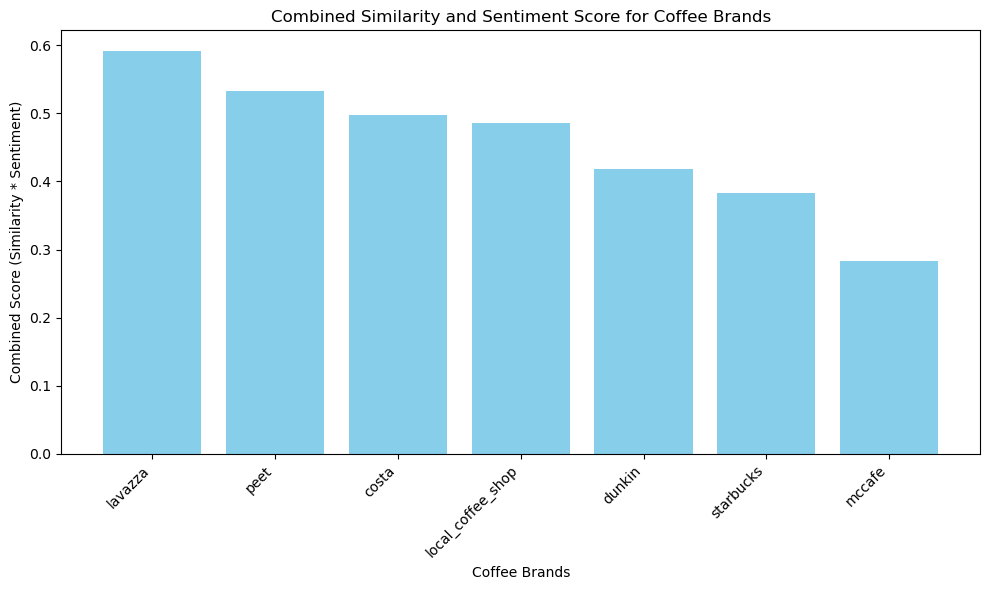

In [43]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Step 1: Calculate sentiment scores for each comment
df['sentiment'] = comments.apply(lambda x: vader.polarity_scores(x)['compound'])

# Step 2: Define a function to calculate average sentiment for a brand
def calculate_average_sentiment(brand, df):
    brand_comments = df[df['cleaned_comments'].str.contains(brand, case=False)]
    return brand_comments['sentiment'].mean()

# Step 3: Calculate similarity for each brand
# Assuming 'compare_brands_with_attributes' is already defined and returns a dictionary of similarity scores
similarity_scores = compare_brands_with_attributes(brands, glove_embeddings, comments, attribute_vector)

# Step 4: Combine similarity with sentiment for each brand
combined_scores = {}
for brand in brands:
    avg_sentiment = calculate_average_sentiment(brand, df)
    similarity_score = similarity_scores[brand]
    combined_scores[brand] = similarity_score * avg_sentiment  # Combine similarity and sentiment

# Step 5: Sort combined scores in descending order
sorted_combined_scores = dict(sorted(combined_scores.items(), key=lambda item: item[1], reverse=True))

# Step 6: Plot a bar chart of the combined similarity and sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_combined_scores.keys(), sorted_combined_scores.values(), color='skyblue')
plt.title('Combined Similarity and Sentiment Score for Coffee Brands')
plt.xlabel('Coffee Brands')
plt.ylabel('Combined Score (Similarity * Sentiment)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

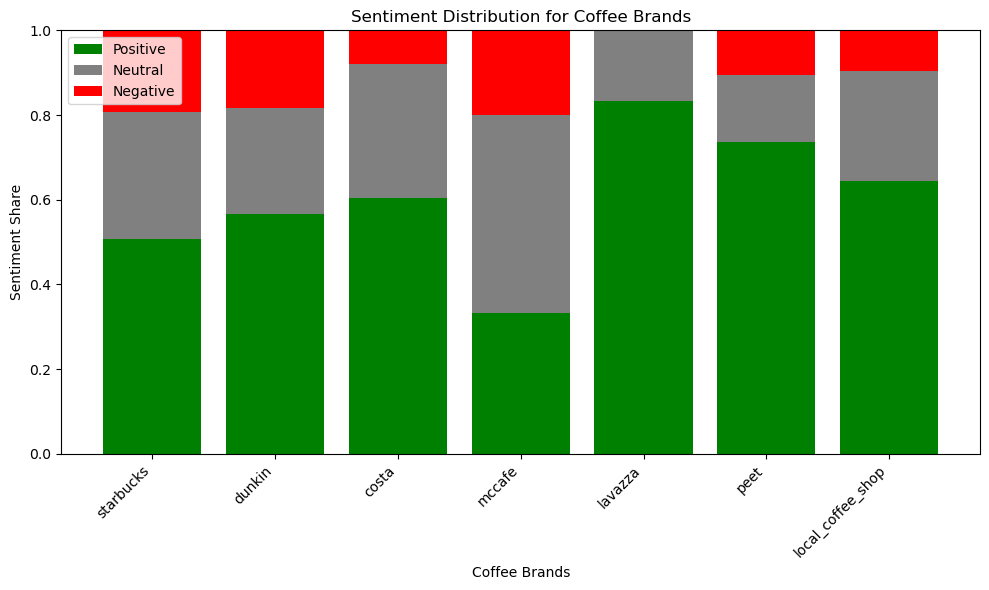

In [44]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()


# Define a function to calculate sentiment for a comment
def get_sentiment(comment, threshold_positive=0.75, threshold_negative=0):
    score = vader.polarity_scores(comment)['compound']
    if score >= threshold_positive:
        return 'positive'
    elif score <= threshold_negative:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'comment_body' column (assuming comments_df has 'comment_body')
df['sentiment'] = df['cleaned_comments'].apply(lambda x: get_sentiment(x))

# Define a function to calculate the share of positive and negative posts for each brand
def calculate_sentiment_share(brands, comments_df):
    sentiment_shares = {}
    for brand in brands:
        # Filter comments related to the brand
        brand_comments = comments_df[comments_df['cleaned_comments'].str.contains(brand, case=False)]
        
        # Count the number of positive, negative, and neutral comments
        positive_count = brand_comments[brand_comments['sentiment'] == 'positive'].shape[0]
        negative_count = brand_comments[brand_comments['sentiment'] == 'negative'].shape[0]
        neutral_count = brand_comments[brand_comments['sentiment'] == 'neutral'].shape[0]
        total_count = brand_comments.shape[0]
        
        if total_count > 0:
            # Calculate the shares of positive, negative, and neutral comments
            positive_share = positive_count / total_count
            negative_share = negative_count / total_count
            neutral_share = neutral_count / total_count
        else:
            positive_share = 0
            negative_share = 0
            neutral_share = 0
        
        sentiment_shares[brand] = {
            'positive_share': positive_share,
            'negative_share': negative_share,
            'neutral_share': neutral_share
        }
    
    return sentiment_shares

# Example usage: Calculate sentiment shares for all brands
sentiment_shares = calculate_sentiment_share(brands, df)

# Prepare data for plotting
positive_shares = [sentiment_shares[brand]['positive_share'] for brand in brands]
negative_shares = [sentiment_shares[brand]['negative_share'] for brand in brands]
neutral_shares = [sentiment_shares[brand]['neutral_share'] for brand in brands]

# Plot stacked bar chart
plt.figure(figsize=(10, 6))

# Stacked bars: positive, negative, and neutral
plt.bar(brands, positive_shares, label='Positive', color='green')
plt.bar(brands, neutral_shares, bottom=positive_shares, label='Neutral', color='gray')
plt.bar(brands, negative_shares, bottom=[i + j for i, j in zip(positive_shares, neutral_shares)], label='Negative', color='red')

# Add labels and title
plt.xlabel('Coffee Brands')
plt.ylabel('Sentiment Share')
plt.title('Sentiment Distribution for Coffee Brands')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

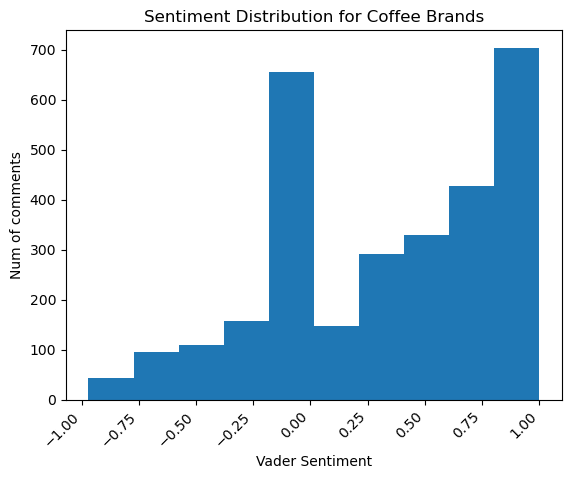

In [45]:

def get_sentiment2(comment):
    score = vader.polarity_scores(comment)['compound']
    return score
    
plt.hist(df['cleaned_comments'].apply(lambda x: get_sentiment2(x)))
plt.xlabel('Vader Sentiment')
plt.ylabel('Num of comments')
plt.title('Sentiment Distribution for Coffee Brands')
plt.xticks(rotation=45, ha='right')

plt.show()

## Similarity based on attributes

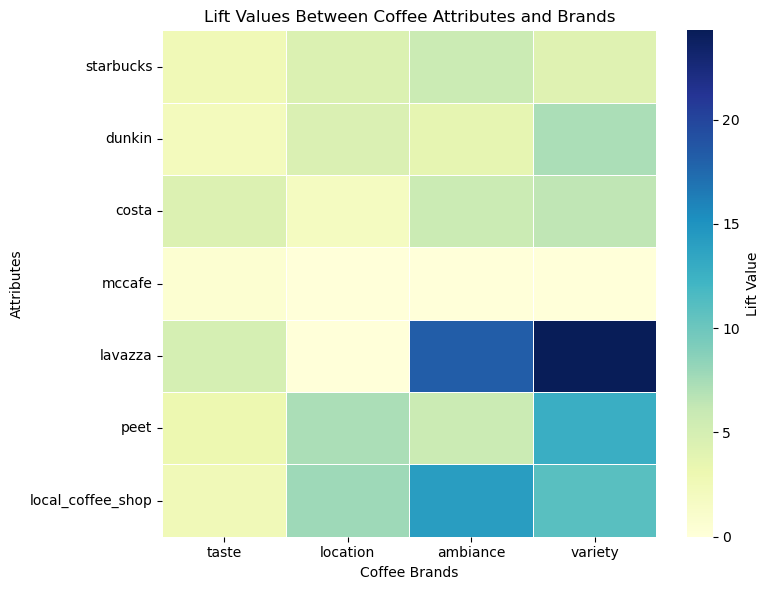

In [58]:
import numpy as np
import seaborn as sns

# Define a function to calculate lift between an attribute and a brand
def calculate_lift(attribute, brand, df):
    # Count the number of comments containing the attribute
    attribute_count = df[df['cleaned_comments'].str.contains(attribute, case=False)].shape[0]
    
    # Count the number of comments containing the brand
    brand_count = df[df['cleaned_comments'].str.contains(brand, case=False)].shape[0]
    
    # Count the number of comments containing both the attribute and the brand
    both_count = df[(df['cleaned_comments'].str.contains(attribute, case=False)) & 
                    (df['cleaned_comments'].str.contains(brand, case=False))].shape[0]
    
    # Total number of comments
    total_count = df.shape[0]
    
    # Calculate probabilities
    P_A = attribute_count / total_count
    P_B = brand_count / total_count
    P_A_and_B = both_count / total_count
    
    # Avoid division by zero by adding a small epsilon
    if P_A > 0 and P_B > 0:
        lift = P_A_and_B / (P_A * P_B)
    else:
        lift = 0  # If either attribute or brand does not occur, lift is 0
    
    return lift

# Step 1: Calculate the lift matrix (num_attributes x num_brands)
lift_matrix = np.zeros((len(attributes), len(brands)))

for i, attribute in enumerate(attributes):
    for j, brand in enumerate(brands):
        lift_matrix[i, j] = calculate_lift(attribute, brand, df)

# Step 2: Convert the lift matrix to a pandas DataFrame for better readability
lift_df = pd.DataFrame(lift_matrix, index=attributes, columns=brands)

# Assuming lift_matrix and lift_df are already defined and have values

# Step 3: Increase the figure size to prevent label overlap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(lift_df.T, annot=False, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Lift Value'})

# Add labels and title
plt.title('Lift Values Between Coffee Attributes and Brands')
plt.xlabel('Coffee Brands')
plt.ylabel('Attributes')

# Ensure the plot displays properly
plt.tight_layout()
plt.show()

In [378]:
lift_df.T

,taste,location,ambiance,variety
starbucks,2.654903,4.546326,5.704593,4.175934
dunkin,2.146377,4.592248,3.656790,7.283607
costa,4.431790,1.812729,5.773879,6.389129
mccafe,0.660424,0.000000,0.000000,0.000000
lavazza,4.953177,0.000000,18.283951,24.278689
peet,3.128322,7.250918,5.773879,12.778257
local_coffee_shop,2.556479,7.777194,14.155317,10.964569


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


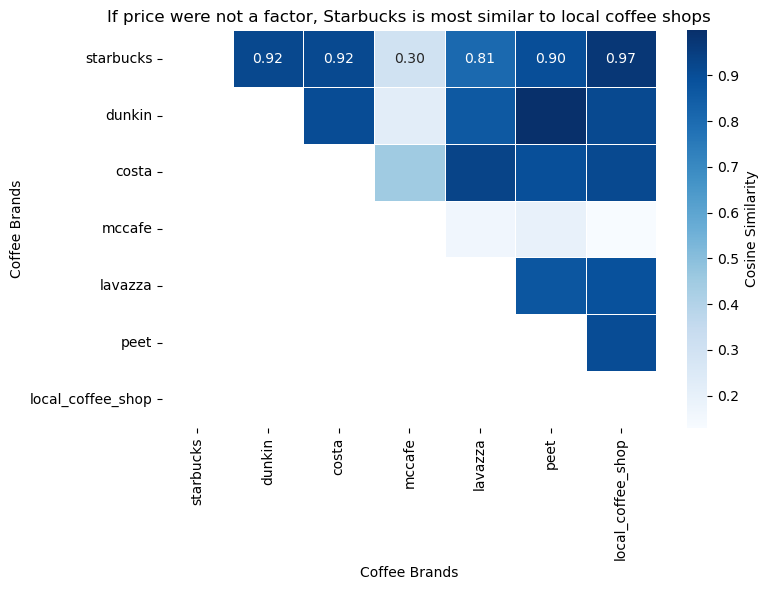

In [60]:
# Step 1: Get the brand-wise lift vectors from lift_df.T (already transposed)
brand_lift_vectors = lift_df.T  # Each row corresponds to a brand, columns are attributes

# Step 2: Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(brand_lift_vectors)

# Step 3: Create a DataFrame for the similarity matrix for better readability
similarity_df = pd.DataFrame(similarity_matrix, index=brands, columns=brands)

# Step 4: Create a mask for the upper triangle (without diagonal)
mask = np.triu(np.ones_like(similarity_df, dtype=bool), k=1)

# Step 5: Apply the mask to set lower triangle and diagonal elements to NaN
similarity_df_upper_tri = similarity_df.where(mask)

# Step 6: Plot the similarity matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df_upper_tri, annot=False, cmap="Blues", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Cosine Similarity'})

# Add labels and title
plt.title('If price were not a factor, Starbucks is most similar to local coffee shops')
plt.xlabel('Coffee Brands')
plt.ylabel('Coffee Brands')

# Ensure the plot displays properly
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


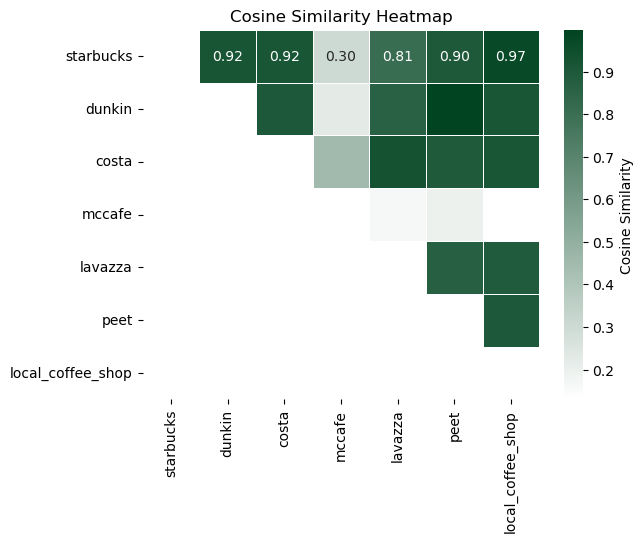

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Assuming similarity_df_upper_tri is your DataFrame
# Create a custom colormap based on the green color from your image

# Define the green color (you can adjust this as needed)
green_color = "#014421"  # Example: Dark green hex code (you can tweak it based on the image)

# Create a colormap that transitions from white to the green color
cmap = LinearSegmentedColormap.from_list("custom_green", ["#FFFFFF", green_color])

# Plot the heatmap using the custom green colormap
sns.heatmap(similarity_df_upper_tri, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Cosine Similarity'})

# Add title and show the plot
plt.title("Cosine Similarity Heatmap")
plt.show()

In [54]:
similarity_df_upper_tri

,starbucks,dunkin,costa,mccafe,lavazza,peet,local_coffee_shop
starbucks,NaN,0.920224,0.916788,0.301191,0.806209,0.899298,0.971994
dunkin,NaN,NaN,0.903955,0.223631,0.860498,0.998319,0.914611
costa,NaN,NaN,NaN,0.449782,0.931508,0.895442,0.913520
mccafe,NaN,NaN,NaN,NaN,0.160847,0.194391,0.129850
lavazza,NaN,NaN,NaN,NaN,NaN,0.870314,0.886860
peet,NaN,NaN,NaN,NaN,NaN,NaN,0.903392
local_coffee_shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


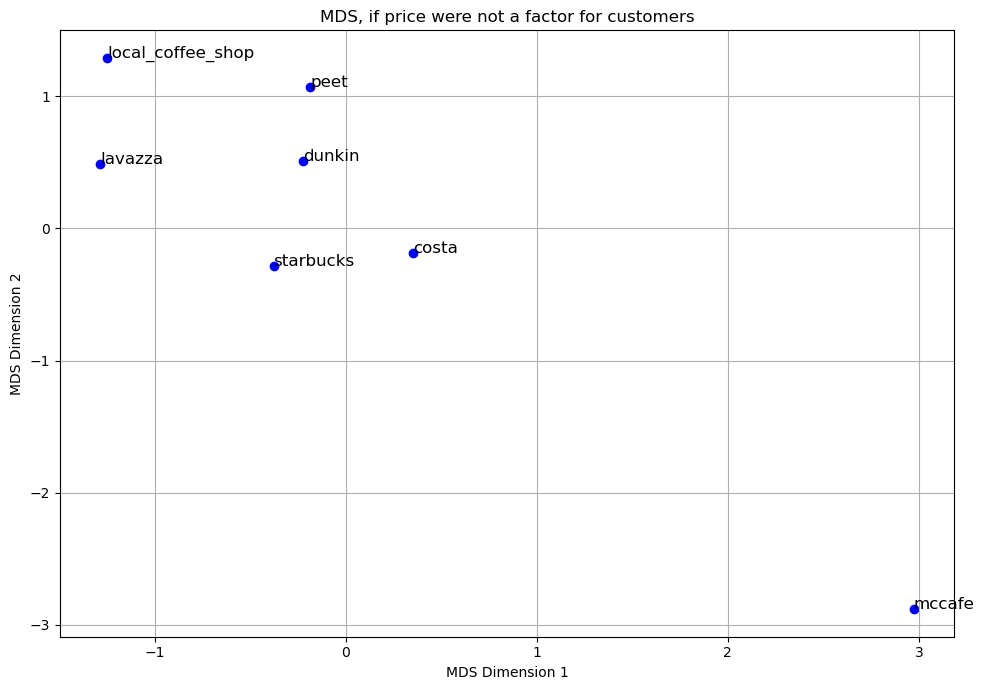

In [56]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Step 1: Inverse of the similarity matrix to compute dissimilarity (1/similarity)
# Avoid division by 1 for the diagonal where similarity = 1
dissimilarity_matrix = 1 / (similarity_matrix + np.eye(len(similarity_matrix)))  # Add identity to avoid division by zero

# Step 2: Apply MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(dissimilarity_matrix)

# Step 3: Plot the MDS results
plt.figure(figsize=(10, 7))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], color='blue')

# Add labels for each brand
for i, brand in enumerate(brands):
    plt.text(mds_coords[i, 0], mds_coords[i, 1], brand, fontsize=12)

# Set plot labels and title
plt.title('MDS, if price were not a factor for customers')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()

## PCA and t-SNE

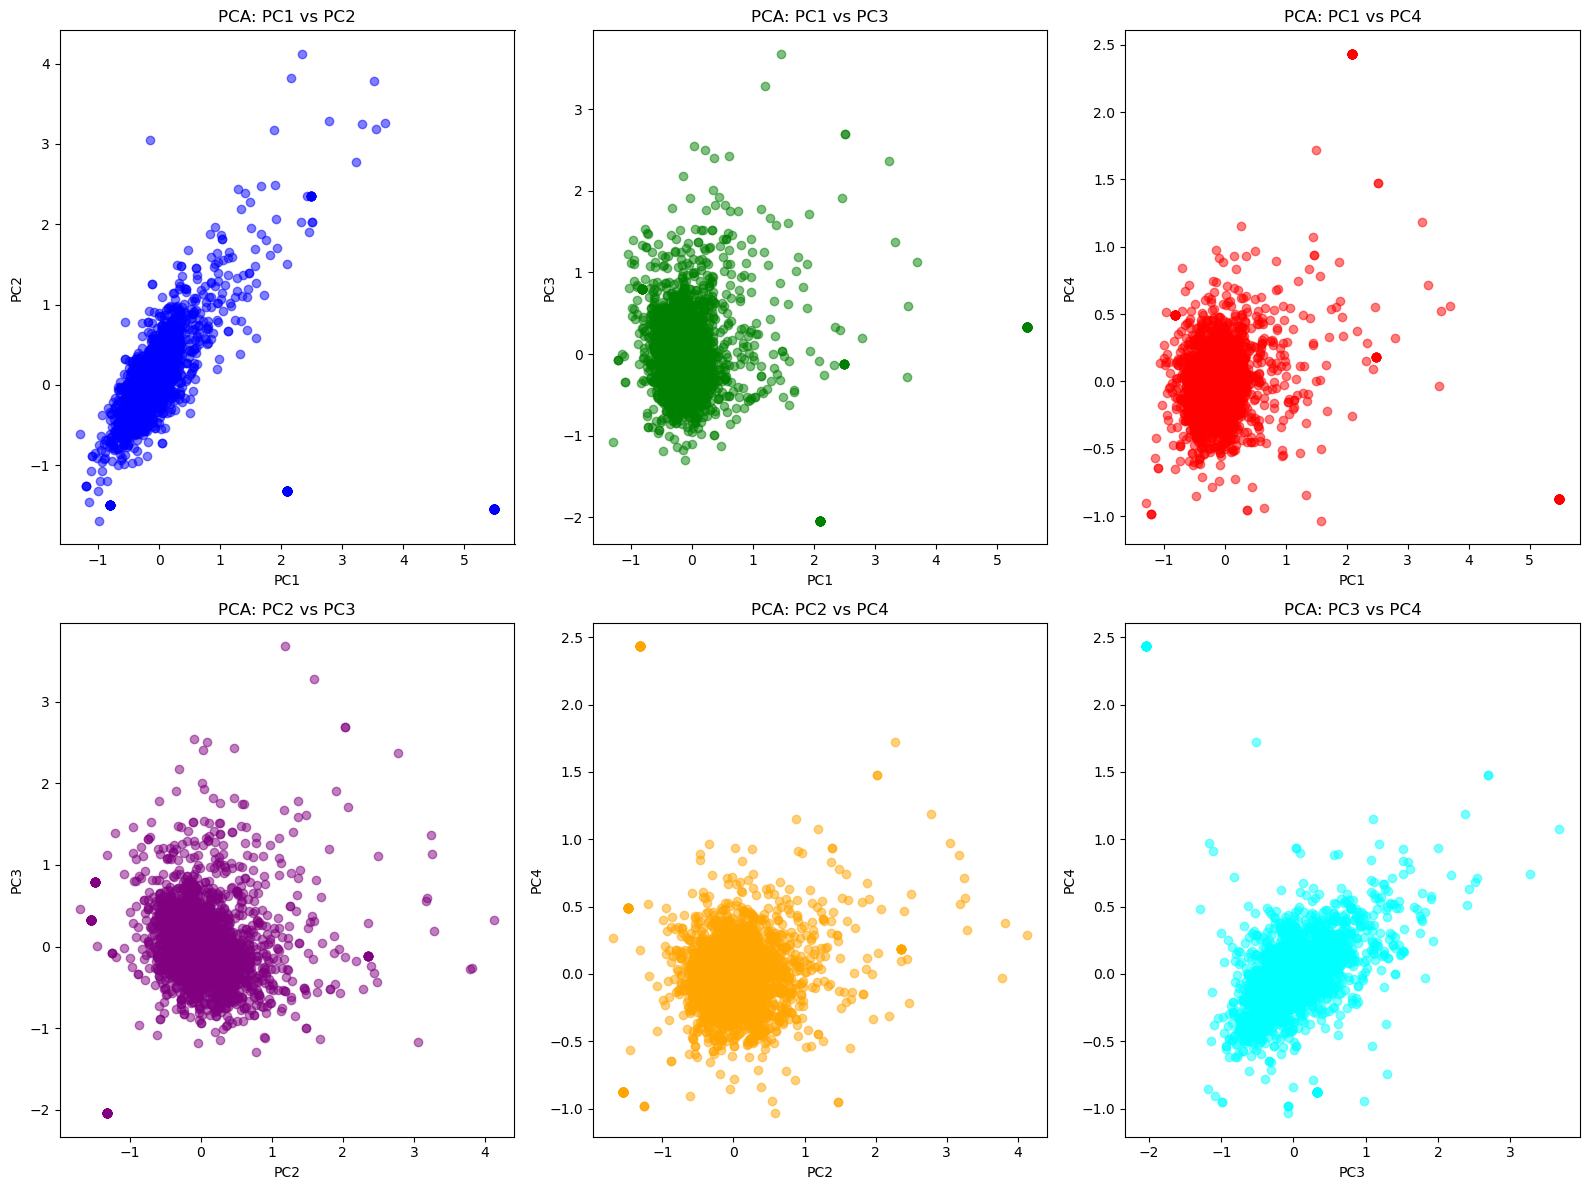

In [394]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Step 2: Function to get the average GloVe vector for a comment
def get_comment_vector(comment, glove_embeddings, embedding_dim=100):
    words = comment.split()
    word_vectors = [glove_embeddings[word] for word in words if word in glove_embeddings]
    
    if len(word_vectors) == 0:
        return np.zeros(embedding_dim)  # Return a zero vector if no words match
    else:
        return np.mean(word_vectors, axis=0)

# Step 3: Vectorize each comment using GloVe embeddings
df['comment_vector'] = df['cleaned_comments'].apply(lambda x: get_comment_vector(x, glove_embeddings))

# Step 4: Prepare the matrix for PCA (extract vectors from DataFrame)
comment_vectors = np.array(df['comment_vector'].tolist())

# Step 3: Apply PCA for dimensionality reduction to 4 components
pca = PCA(n_components=4)
pca_result = pca.fit_transform(comment_vectors)

# Step 4: Create pairwise scatter plots for the first 4 PCs using a loop
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]  # All pairwise combinations of the first 4 PCs
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']  # Colors for each plot

plt.figure(figsize=(16, 12))

# Loop through each pair of PCs and plot
for i, (pc_x, pc_y) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    plt.scatter(pca_result[:, pc_x], pca_result[:, pc_y], color=colors[i], alpha=0.5)
    plt.title(f'PCA: PC{pc_x + 1} vs PC{pc_y + 1}')
    plt.xlabel(f'PC{pc_x + 1}')
    plt.ylabel(f'PC{pc_y + 1}')

# Adjust layout for the plot
plt.tight_layout()
plt.show()

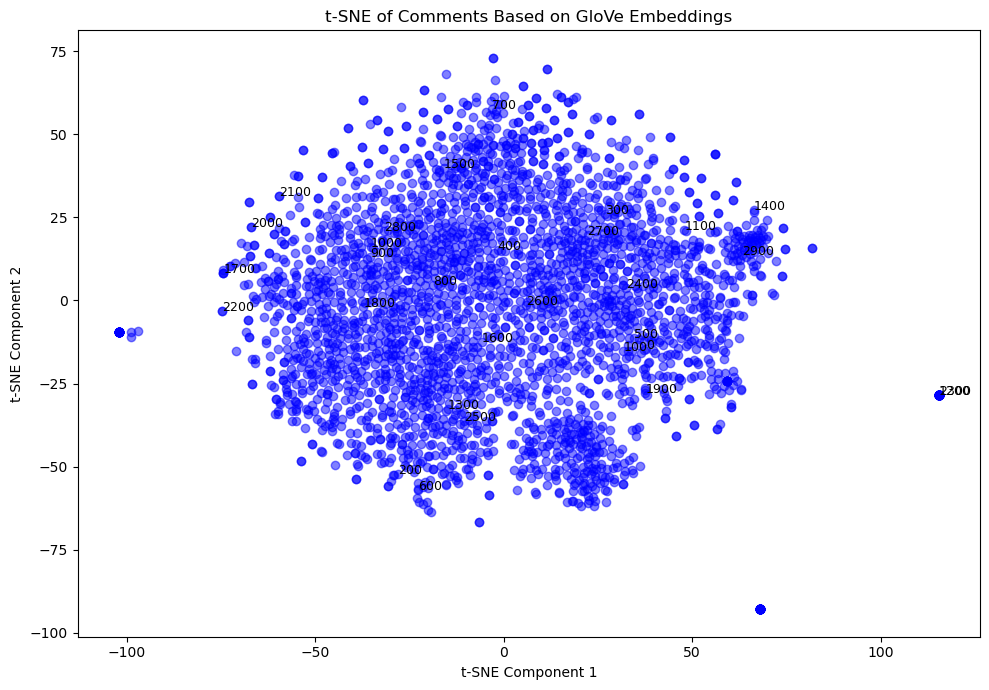

In [396]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Vectorize each comment using GloVe embeddings (Assuming df['cleaned_comments'] is available)
df['comment_vector'] = df['cleaned_comments'].apply(lambda x: get_comment_vector(x, glove_embeddings))

# Step 2: Prepare the matrix for t-SNE (extract vectors from DataFrame)
comment_vectors = np.array(df['comment_vector'].tolist())

# Step 3: Apply t-SNE for dimensionality reduction
# Start with some basic t-SNE parameters for calibration
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(comment_vectors)

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color='blue', alpha=0.5)

# Optionally, label some points (for better readability, limit the number of labels)
for i in range(len(tsne_result)):
    if i % 100 == 0:  # Only label every 100th point to avoid crowding
        plt.text(tsne_result[i, 0], tsne_result[i, 1], str(i), fontsize=9)

# Add labels and title
plt.title('t-SNE of Comments Based on GloVe Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Show the plot
plt.tight_layout()
plt.show()

#### No results found from PCA, and t-SNE

## Assessing customer perceptions

In [26]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet data if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


df = pd.concat([reddit.rename(columns = {'combined_text':'Comment'})[['Comment','year']] , quora_df[['Comment','year']]], axis=0)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize the text
def lemmatize_text(text):
    words = nltk.word_tokenize(text)  # Tokenize the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Join the lemmatized words back into a string

# Define a text preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Lemmatize the text
    text = lemmatize_text(text)
    return text

# Apply preprocessing to the comments column
df['cleaned_comments'] = df['Comment'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Comment,year,cleaned_comments
0,James Hoffmann - I Tried Every New Starbucks O...,2023.0,james hoffmann i tried every new starbucks oli...
1,Mod Note: This video has now gone private. W...,2023.0,mod note this video ha now gone private well k...
2,‚Ä¶ the what,2023.0,the what
3,‚ÄúBut then my brain adjusted to the nuts.‚Äù,2023.0,but then my brain adjusted to the nut
4,"The deconstructed one... Holy shit, that's a ...",2023.0,the deconstructed one holy shit thats a lot of...


In [28]:
# Task 1: Filter for comments that mention "starbucks"
df_starbucks = df[df['cleaned_comments'].str.contains('starbucks', case=False, na=False)]

# Check the filtered dataframe
print(f"Number of comments mentioning Starbucks: {df_starbucks.shape[0]}")

Number of comments mentioning Starbucks: 1005


In [30]:
df.shape

(4295, 3)

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Task 2: Tokenization and stopword removal for LDA topic modeling

# Tokenize and remove stopwords from the cleaned comments
df_starbucks['tokenized_comments'] = df_starbucks['cleaned_comments'].apply(
    lambda x: [word for word in word_tokenize(x) if word not in stop_words]
)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df_starbucks['tokenized_comments'])
corpus = [dictionary.doc2bow(text) for text in df_starbucks['tokenized_comments']]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amansharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/2163021052.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starbucks['tokenized_comments'] = df_starbucks['cleaned_comments'].apply(


(0, '0.034*"coffee" + 0.032*"starbucks" + 0.013*"wa" + 0.012*"like" + 0.009*"people"')
(1, '0.045*"starbucks" + 0.040*"coffee" + 0.011*"customer" + 0.010*"experience" + 0.008*"bean"')
(2, '0.044*"coffee" + 0.028*"starbucks" + 0.008*"good" + 0.008*"customer" + 0.006*"quality"')
(3, '0.049*"coffee" + 0.030*"starbucks" + 0.020*"drink" + 0.011*"espresso" + 0.009*"get"')
(4, '0.013*"starbucks" + 0.007*"coffee" + 0.006*"wa" + 0.005*"blend" + 0.004*"cold"')


In [46]:
df_starbucks.head()

,Comment,year,cleaned_comments,tokenized_comments
0,James Hoffmann - I Tried Every New Starbucks O...,2023.0,james hoffmann i tried every new starbucks oli...,"[james, hoffmann, tried, every, new, starbucks..."
1,Mod Note: This video has now gone private. W...,2023.0,mod note this video ha now gone private well k...,"[mod, note, video, ha, gone, private, well, ke..."
4,"The deconstructed one... Holy shit, that's a ...",2023.0,the deconstructed one holy shit thats a lot of...,"[deconstructed, one, holy, shit, thats, lot, o..."
6,The Starbucks reserve roastery sure is an exp...,2023.0,the starbucks reserve roastery sure is an expe...,"[starbucks, reserve, roastery, sure, experienc..."
9,James Hoffmann reviewing Starbucks is like An...,2023.0,james hoffmann reviewing starbucks is like ant...,"[james, hoffmann, reviewing, starbucks, like, ..."


In [57]:
import pandas as pd

# Task: Export topic-wise loadings from LDA to a CSV

# Get the topic distribution for each document
def get_document_topics(lda_model, corpus, num_topics):
    # Get the topic distribution for each document (in a dense format)
    topic_loadings = []
    
    for doc in corpus:
        # Get the topic distribution for the document
        topics = lda_model.get_document_topics(doc, minimum_probability=0)
        # Convert to a dense format (list of just probabilities)
        topic_vector = [0] * num_topics
        for topic_num, topic_prob in topics:
            topic_vector[topic_num] = topic_prob
        topic_loadings.append(topic_vector)
    
    return topic_loadings

num_topics=5
# Get the topic loadings for the corpus
document_topics = get_document_topics(lda_model, corpus, num_topics)

# Convert the topic loadings to a DataFrame
topic_columns = [f"Topic_{i+1}" for i in range(num_topics)]
topic_df = pd.DataFrame(document_topics, columns=topic_columns)

# Optionally, you can add the original comments as well for reference
#topic_df['cleaned_comments'] = df_starbucks['cleaned_comments'].values
topic_df['cleaned_comments'] = df_starbucks['Comment'].values

# Export the DataFrame to CSV
topic_df.to_csv('lda_topic_loadings.csv', index=False)


In [42]:
import pandas as pd

# Task: Export topic-wise word weightage for all words in the corpus

# Get the weightage of all words across all topics
def get_all_word_weights(lda_model, dictionary):
    word_topic_data = {}
    
    # Loop through each topic
    for topic_id in range(lda_model.num_topics):
        # Get the words and their corresponding weight in the topic
        topic_words = lda_model.get_topic_terms(topic_id, topn=len(dictionary))  # Get all words in the dictionary
        
        for word_id, weight in topic_words:
            word = dictionary[word_id]  # Get the actual word from the word ID
            if word not in word_topic_data:
                word_topic_data[word] = {}
            word_topic_data[word][f'Topic_{topic_id + 1}'] = weight  # Store weight for this topic
    
    return word_topic_data

# Get the word-topic weightage for all words
word_topic_data = get_all_word_weights(lda_model, dictionary)

# Convert the word-topic data to a DataFrame
word_topic_df = pd.DataFrame.from_dict(word_topic_data, orient='index').fillna(0)

# Export the DataFrame to a CSV file
word_topic_df.to_csv('lda_word_topic_weightage.csv')

# Check the first few rows of the DataFrame
print(word_topic_df.head())

            Topic_1   Topic_2   Topic_3
coffee     0.052823  0.009160  0.030025
starbucks  0.031259  0.026257  0.039198
drink      0.012171  0.003205  0.005484
like       0.010645  0.007113  0.003986
get        0.008540  0.005117  0.001075


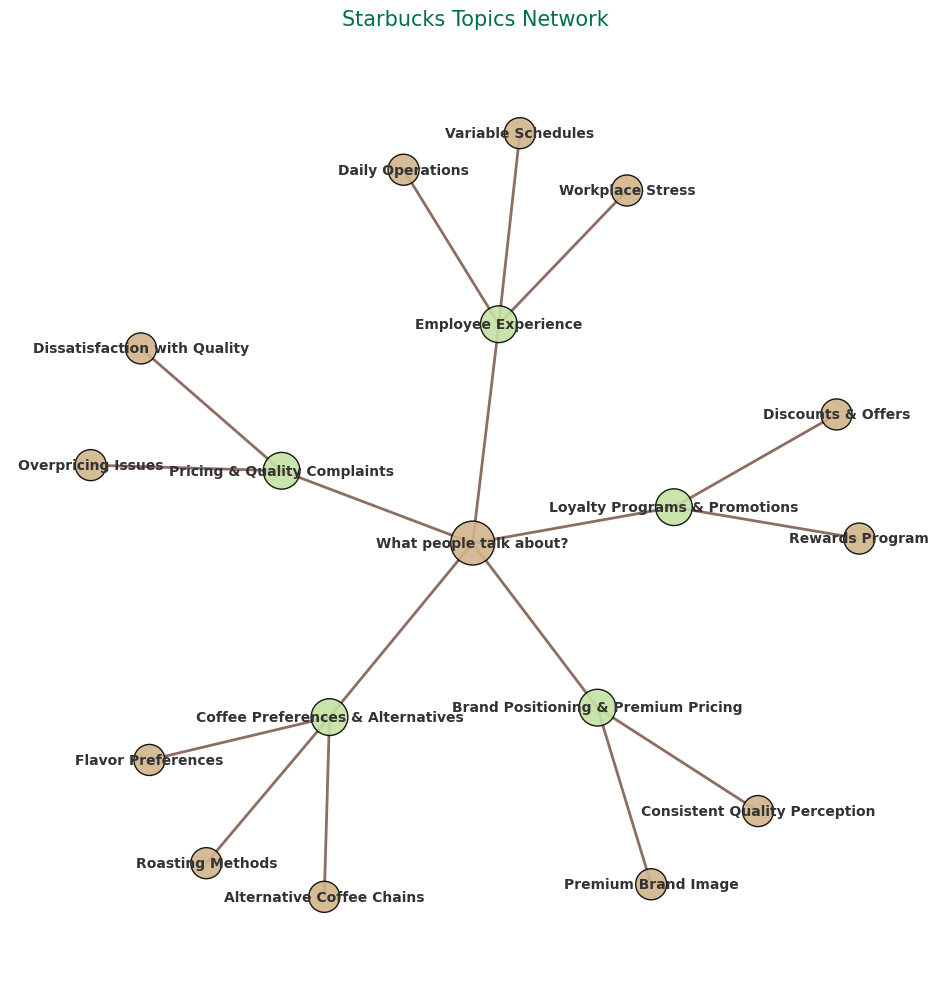

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the graph
G = nx.Graph()

# Define the topics and their subcategories
categories = {
    "Pricing & Quality Complaints": ["Overpricing Issues", "Dissatisfaction with Quality"],
    "Employee Experience": ["Variable Schedules", "Workplace Stress", "Daily Operations"],
    "Brand Positioning & Premium Pricing": ["Premium Brand Image", "Consistent Quality Perception"],
    "Coffee Preferences & Alternatives": ["Flavor Preferences", "Roasting Methods", "Alternative Coffee Chains"],
    "Loyalty Programs & Promotions": [ "Discounts & Offers", "Rewards Program"]
}

# Add the main node (Starbucks Topics)
G.add_node("What people talk about?", size=1000)

# Add all the main category nodes and connect to the central node
for category, subcategories in categories.items():
    G.add_node(category, size=700)
    G.add_edge("What people talk about?", category, weight=2)
    
    # Add subcategory nodes and connect them to the main category nodes
    for subcategory in subcategories:
        G.add_node(subcategory, size=500)
        G.add_edge(category, subcategory, weight=1)

# Node sizes and positions
sizes = [G.nodes[node].get('size', 300) for node in G.nodes]
pos = nx.spring_layout(G, seed=42)  # Spring layout for aesthetics

# Starbucks-inspired color scheme
central_node_color = '#00704A'  # Starbucks dark green
main_category_color = '#C5E1A5'  # Light green
subcategory_color = '#D2B48C'    # Beige (to represent coffee)
edge_color = '#8D6E63'           # Light brown

color_map = []
for node in G.nodes:
    if node == "Starbucks Topics":
        color_map.append(central_node_color)  # Central node: Dark Green
    elif node in categories:
        color_map.append(main_category_color)  # Main categories: Light Green
    else:
        color_map.append(subcategory_color)  # Subcategories: Beige

# Draw the network graph
plt.figure(figsize=(12, 12), facecolor="white")  # Starbucks-themed background (light beige)

# Draw the nodes with color and size
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=color_map, alpha=0.9, edgecolors='black')

# Draw the edges
nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_color)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color="#333333")

# Display the graph
plt.title('Starbucks Topics Network', size=15, color='#00704A', pad=20)  # Dark green title
plt.axis('off')  # Turn off axis
plt.savefig('starbucks_topics_network.jpeg', format='jpeg', dpi=300)  # Save as JPEG

plt.show()

In [73]:


import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize

# Load GloVe embeddings (assuming 100-dimensional GloVe is used, you can change the file path and dimensions if necessary)
glove_embeddings = {}
with open('glove.6B/glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Task 3: Cosine similarity calculation for each attribute using GloVe

# Function to compute the average GloVe embedding for a sentence
def sentence_embedding(text, embeddings_index, embedding_dim=100):
    words = [word for word in word_tokenize(text.lower()) if word in embeddings_index]
    if words:
        # Average the embeddings for all valid words
        embedding = np.mean([embeddings_index[word] for word in words], axis=0)
    else:
        # If no words match, return a zero vector
        embedding = np.zeros(embedding_dim)
    return embedding

# Attributes to calculate similarity for
attributes = ['price', 'variety', 'ambience', 'taste', 'location']

# Calculate cosine similarity for each attribute
attribute_similarities = {}

for attribute in attributes:
    # Get the GloVe embedding for the attribute
    attribute_embedding = sentence_embedding(attribute, glove_embeddings)
    
    # Calculate cosine similarity between the attribute and each cleaned comment
    similarity_scores = []
    for comment in df_starbucks['cleaned_comments']:
        comment_embedding = sentence_embedding(comment, glove_embeddings)
        similarity = cosine_similarity([attribute_embedding], [comment_embedding])[0][0]  # Cosine similarity
        similarity_scores.append(similarity)
    
    # Store the similarity scores in the dictionary
    attribute_similarities[attribute] = similarity_scores

# Store cosine similarity for each attribute in the dataframe
for attribute in attributes:
    df_starbucks[f'similarity_{attribute}'] = attribute_similarities[attribute]

# Check the resulting dataframe
df_starbucks.head()

/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/3544861711.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starbucks[f'similarity_{attribute}'] = attribute_similarities[attribute]


,Comment,year,cleaned_comments,tokenized_comments,similarity_price,similarity_variety,similarity_ambience,similarity_taste,similarity_location
0,James Hoffmann - I Tried Every New Starbucks O...,2023.0,james hoffmann i tried every new starbucks oli...,"[james, hoffmann, tried, every, new, starbucks...",0.646167,0.557647,0.107917,0.598073,0.472257
1,Mod Note: This video has now gone private. W...,2023.0,mod note this video ha now gone private well k...,"[mod, note, video, ha, gone, private, well, ke...",0.608494,0.595965,0.133992,0.467797,0.603873
4,"The deconstructed one... Holy shit, that's a ...",2023.0,the deconstructed one holy shit thats a lot of...,"[deconstructed, one, holy, shit, thats, lot, o...",0.624038,0.595405,0.166715,0.551665,0.572738
6,The Starbucks reserve roastery sure is an exp...,2023.0,the starbucks reserve roastery sure is an expe...,"[starbucks, reserve, roastery, sure, experienc...",0.606112,0.631381,0.191613,0.506395,0.655305
9,James Hoffmann reviewing Starbucks is like An...,2023.0,james hoffmann reviewing starbucks is like ant...,"[james, hoffmann, reviewing, starbucks, like, ...",0.608695,0.589923,0.183709,0.459507,0.591677


In [75]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Task 4: Calculate sentiment score and combined score

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER
def calculate_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound score for overall sentiment

# Apply sentiment calculation
df_starbucks['sentiment_score'] = df_starbucks['cleaned_comments'].apply(calculate_sentiment)

# Calculate combined score for each attribute
for attribute in attributes:
    df_starbucks[f'combined_score_{attribute}'] = df_starbucks[f'similarity_{attribute}'] * df_starbucks['sentiment_score']

# Check the updated dataframe
df_starbucks.head()

/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/4071886397.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starbucks['sentiment_score'] = df_starbucks['cleaned_comments'].apply(calculate_sentiment)
/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/4071886397.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starbucks[f'combined_score_{attribute}'] = df_starbucks[f'similarity_{attribute}'] * df_starbucks['sentiment_score']
/var/folders/98/9mpqczkx3011qp7wbmnvfmb000

,Comment,year,cleaned_comments,tokenized_comments,similarity_price,similarity_variety,similarity_ambience,similarity_taste,similarity_location,sentiment_score,combined_score_price,combined_score_variety,combined_score_ambience,combined_score_taste,combined_score_location
0,James Hoffmann - I Tried Every New Starbucks O...,2023.0,james hoffmann i tried every new starbucks oli...,"[james, hoffmann, tried, every, new, starbucks...",0.646167,0.557647,0.107917,0.598073,0.472257,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Mod Note: This video has now gone private. W...,2023.0,mod note this video ha now gone private well k...,"[mod, note, video, ha, gone, private, well, ke...",0.608494,0.595965,0.133992,0.467797,0.603873,0.8943,0.544176,0.532971,0.119829,0.418351,0.540044
4,"The deconstructed one... Holy shit, that's a ...",2023.0,the deconstructed one holy shit thats a lot of...,"[deconstructed, one, holy, shit, thats, lot, o...",0.624038,0.595405,0.166715,0.551665,0.572738,0.7346,0.458419,0.437384,0.122469,0.405253,0.420733
6,The Starbucks reserve roastery sure is an exp...,2023.0,the starbucks reserve roastery sure is an expe...,"[starbucks, reserve, roastery, sure, experienc...",0.606112,0.631381,0.191613,0.506395,0.655305,0.8747,0.530166,0.552269,0.167604,0.442944,0.573196
9,James Hoffmann reviewing Starbucks is like An...,2023.0,james hoffmann reviewing starbucks is like ant...,"[james, hoffmann, reviewing, starbucks, like, ...",0.608695,0.589923,0.183709,0.459507,0.591677,0.8126,0.494625,0.479371,0.149282,0.373396,0.480797


/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/3559952697.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_series_data = df_starbucks.groupby('year').mean()


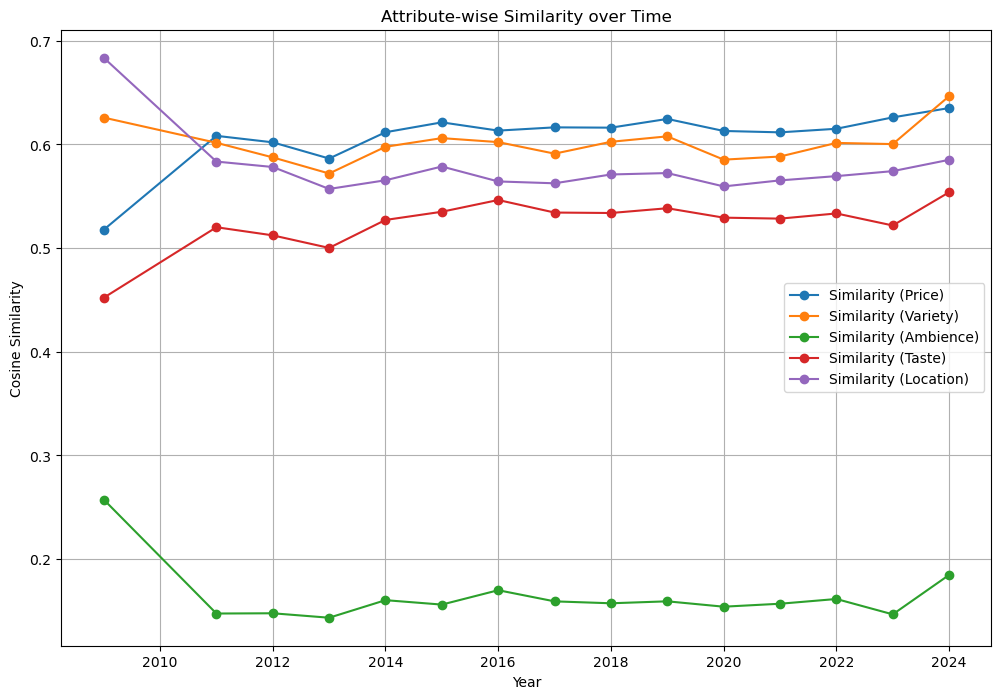

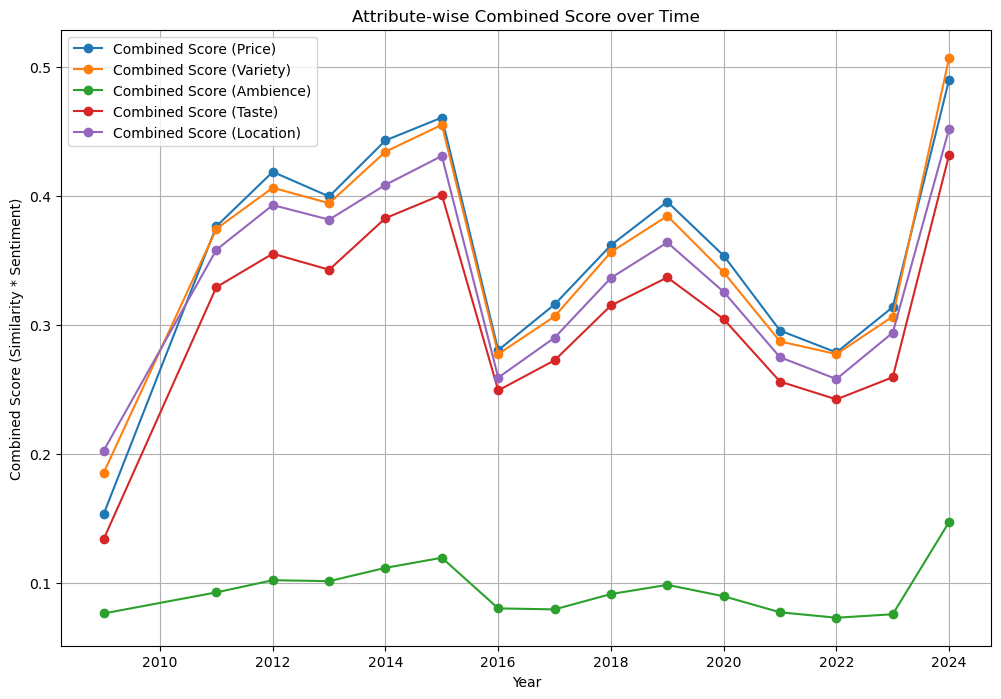

In [77]:
# Task 5: Plot attribute-wise similarity and combined score over time

# Group by year and calculate the mean for similarity and combined score
time_series_data = df_starbucks.groupby('year').mean()

# Plot the attribute-wise similarity over time
plt.figure(figsize=(12, 8))

for attribute in attributes:
    plt.plot(time_series_data.index, time_series_data[f'similarity_{attribute}'], marker='o', linestyle='-', label=f'Similarity ({attribute.capitalize()})')

plt.title('Attribute-wise Similarity over Time')
plt.xlabel('Year')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.legend()
plt.show()

# Plot the combined score over time for each attribute
plt.figure(figsize=(12, 8))

for attribute in attributes:
    plt.plot(time_series_data.index, time_series_data[f'combined_score_{attribute}'], marker='o', linestyle='-', label=f'Combined Score ({attribute.capitalize()})')

plt.title('Attribute-wise Combined Score over Time')
plt.xlabel('Year')
plt.ylabel('Combined Score (Similarity * Sentiment)')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/2690222967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{attribute}_mention'] = df['cleaned_comments'].str.contains(attribute, case=False, na=False).astype(int)
/var/folders/98/9mpqczkx3011qp7wbmnvfmb00000gn/T/ipykernel_2331/2690222967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{attribute}_mention'] = df['cleaned_comments'].str.contains(attribute, case=False, na=False).astype(int)
/var/folders/98/9mpqczkx3011qp7wbmnvfm

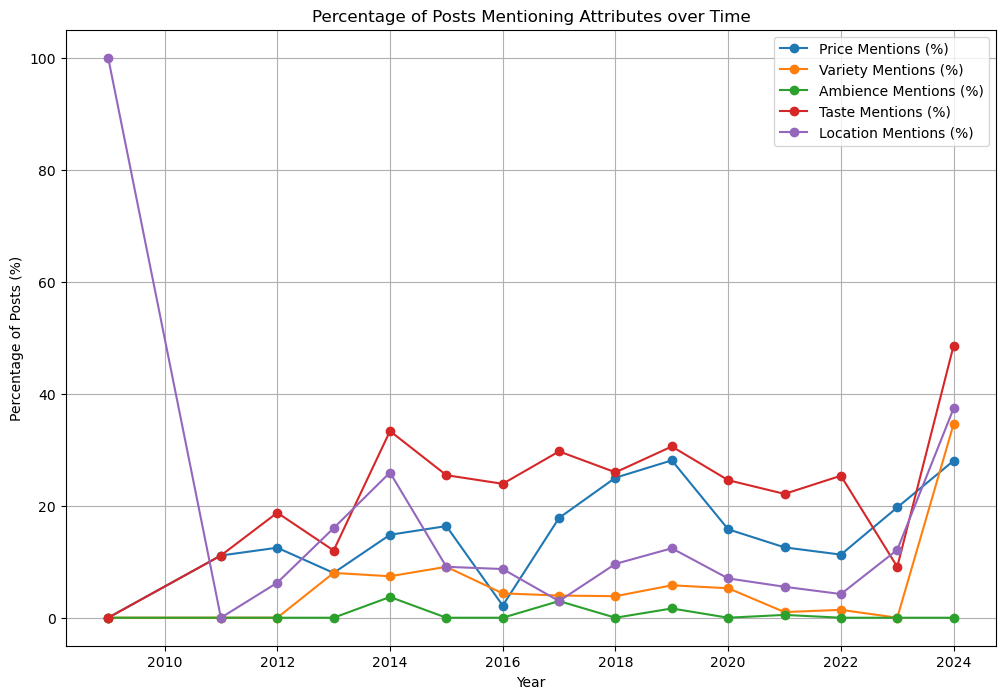

In [79]:
# Task 6: Plot the percentage of posts mentioning each attribute over time

# Function to calculate percentage of posts mentioning an attribute
def percentage_mentions(attribute, df):
    df[f'{attribute}_mention'] = df['cleaned_comments'].str.contains(attribute, case=False, na=False).astype(int)
    return df.groupby('year')[f'{attribute}_mention'].mean() * 100

# Calculate percentage of posts mentioning each attribute over time
percentage_mentions_data = pd.DataFrame({attribute: percentage_mentions(attribute, df_starbucks) for attribute in attributes})

# Plot the percentage of posts mentioning each attribute over time
plt.figure(figsize=(12, 8))

for attribute in attributes:
    plt.plot(percentage_mentions_data.index, percentage_mentions_data[attribute], marker='o', linestyle='-', label=f'{attribute.capitalize()} Mentions (%)')

plt.title('Percentage of Posts Mentioning Attributes over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Posts (%)')
plt.grid(True)
plt.legend()
plt.show()